<a href="https://colab.research.google.com/github/tort-cam/ST-554-P1/blob/main/Task2/ST554Proj1EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Here we go!
###Installing the tools I will need, as well as pulling in the data from UCI

In [1]:
!pip install ucimlrepo

In [2]:
import numpy as np
import pandas as pd
import math
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import datetime

In [3]:
air_quality = fetch_ucirepo(id=360)
aq = pd.DataFrame(air_quality.data.features)

In [4]:
aq

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


We were told we can ignore the "True" pollutant measurements, other than Benzene.

In [5]:
aq_sub = aq.iloc[:,[0,1,3,5,6,8,10,11,12,13,14]]

taking a look at aq_sub, it seems good! Removed what we don't need.

In [25]:
aq_sub

,Date,Time,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,1360,11.9,1046,1056,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,1292,9.4,955,1174,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,1402,9.0,939,1140,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,1376,9.2,948,1092,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1272,6.5,836,1205,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,1314,13.5,1101,539,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,1163,11.4,1027,604,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,1142,12.4,1063,603,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,1003,9.5,961,702,1041,770,28.3,13.5,0.5139


Taking a quick peek at what we're working with, using the .describe() method.
Looks like there are a lot of -200 values.

In [24]:
aq_sub.describe()

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1048.990061,1.865683,894.595276,794.990168,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,329.832710,41.380206,342.333252,321.993552,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,921.000000,4.000000,711.000000,637.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1053.000000,7.900000,895.000000,794.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,1221.000000,13.600000,1105.000000,960.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,2040.000000,63.700000,2214.000000,2683.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


Let's see how many "-200"s there are: Looks like we've got ~3300 missing values, but only in 366 rows. This suggests that these missing values are often stacked in single rows.

In [8]:
na_ct = 0
row_ct = 0
test = False
for row in aq_sub.iloc[:,2:].values:
  test = False
  for val in row:
    if math.isclose(val, -200):
      na_ct+=1
      test = True
  if test:
    row_ct+=1
print (str(na_ct))
print (row_ct)

3294
366


Okay! Let's replace these -200 values with `NaN` values, and then we can use `.dropna()` to remove them. And our df has gotten 366 rows shorter, the number we were expecting from the last cell's `row_ct` value. I've decided on `aqf` as our dataFrame name, for "Air Quality Fixed". We've also renamed our columns for clarity. Now, let's take another look at `.describe()`

In [9]:
aqtemp = aq_sub.replace(float(-200), np.nan)
aqf = aqtemp.dropna()
print(len(aq_sub)-len(aqf))
aqf = aqf.rename(columns={'C6H6(GT)': 'B', 'PT08.S1(CO)': 'CO', \
                          'PT08.S2(NMHC)': 'NMHC', 'PT08.S3(NOx)': 'NOx', \
                          'PT08.S4(NO2)': 'NO2', 'PT08.S5(O3)': 'O3'})
aqf.describe()

366


,CO,B,NMHC,NOx,NO2,O3,T,RH,AH
count,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,1099.833166,10.083105,939.153376,835.493605,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,217.080037,7.449820,266.831429,256.817320,346.206794,398.484288,8.832116,17.316892,0.403813
min,647.000000,0.100000,383.000000,322.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,937.000000,4.400000,734.500000,658.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1063.000000,8.200000,909.000000,806.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,1231.000000,14.000000,1116.000000,969.500000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,2040.000000,63.700000,2214.000000,2683.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


Now that we've cleaned up these missing values, let's get to work! Looks like Benzene (B) is pretty right skewed, with most values being <20.

(array([3.497e+03, 2.899e+03, 1.510e+03, 7.000e+02, 2.540e+02, 9.200e+01,
        2.200e+01, 1.500e+01, 1.000e+00, 1.000e+00]),
 array([ 0.1 ,  6.46, 12.82, 19.18, 25.54, 31.9 , 38.26, 44.62, 50.98,
        57.34, 63.7 ]),
 <BarContainer object of 10 artists>)

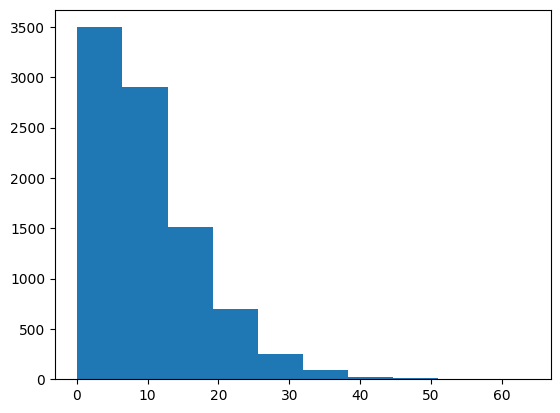

In [10]:
plt.hist(aqf["B"])

Here I am reformatting date and time into a singe column for simplicity, and using `datetime` to treat them as a numeric value.

In [42]:
aqf["DTtemp"] = aqf['Date'] + " " + aqf["Time"]
aqf["datetime"] = pd.to_datetime((aqf['DTtemp']), format = 'mixed', dayfirst = False)
aqf = aqf.drop("DTtemp", axis = 1)

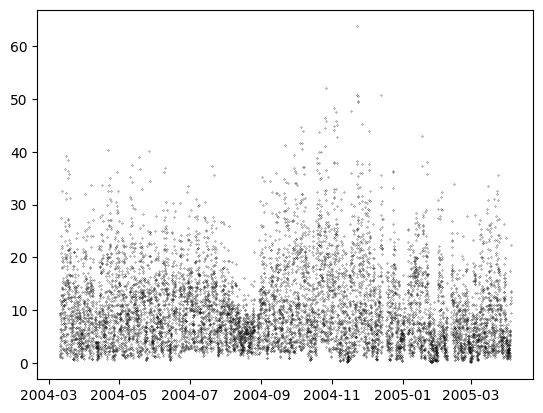

In [51]:
plt.scatter(aqf["datetime"], aqf["B"], s = .05, c = "black")